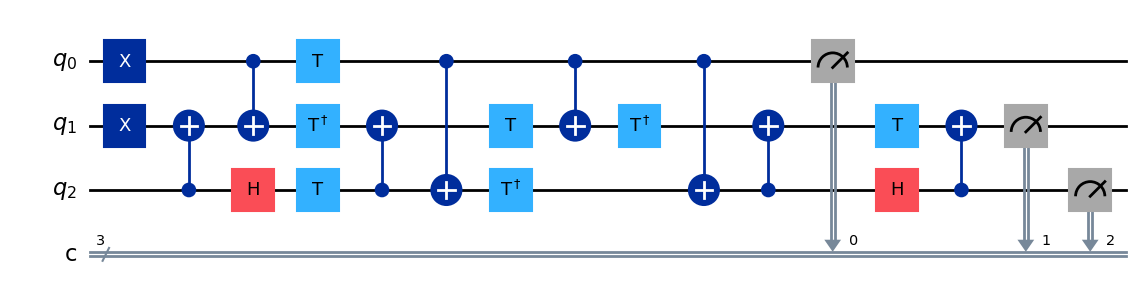

In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend = GenericBackendV2(4)

new_fredkin=QuantumCircuit.from_qasm_file('fredkin.qasm')
new_fredkin.draw("mpl")

In [3]:
new_fredkin.depth()

12

In [4]:
new_fredkin.count_ops()

OrderedDict([('cx', 8),
             ('t', 4),
             ('tdg', 3),
             ('measure', 3),
             ('x', 2),
             ('h', 2)])

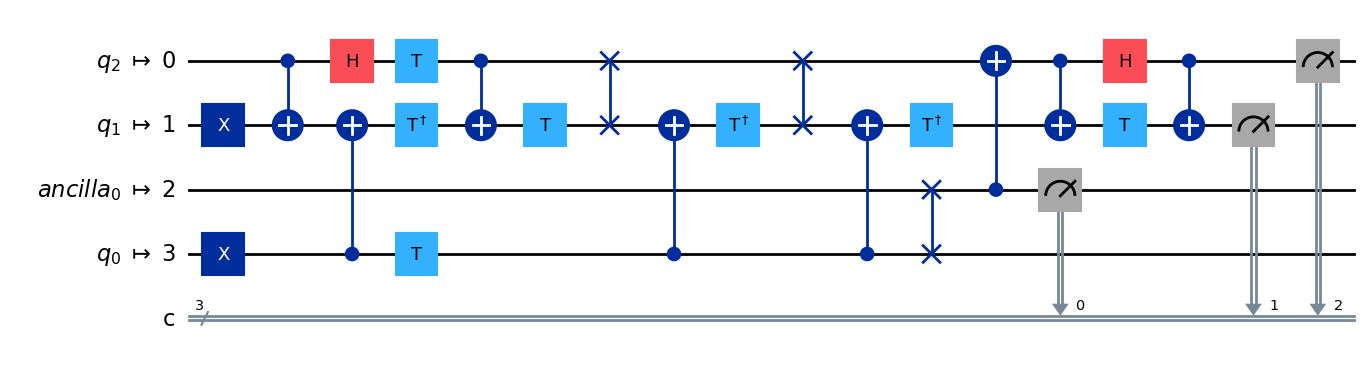

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1
backend1 = GenericBackendV2(num_qubits=4,coupling_map=[[0, 1], [0, 2], [1, 0], [1, 3], [2, 0], [2, 3], [3, 1], [3, 2]])

trans_fredkin = transpile(new_fredkin, backend=backend1, optimization_level=3, basis_gates=['t', 'tdg', 'cx', 'x','h','swap'])
#trans_qiskit=trans_qiskit1.decompose()
trans_fredkin.draw("mpl")

In [6]:
trans_fredkin.depth()

15

In [7]:
trans_fredkin.count_ops()

OrderedDict([('cx', 8),
             ('t', 4),
             ('swap', 3),
             ('tdg', 3),
             ('measure', 3),
             ('x', 2),
             ('h', 2)])

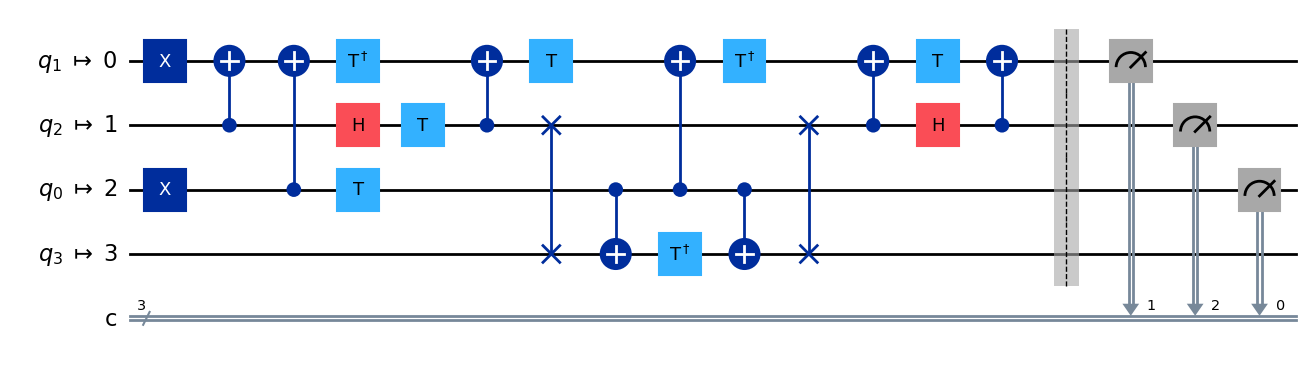

In [20]:
from mqt import qmap

arch = qmap.Architecture(
    4,
    {
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 3),
        (2, 0),
        (2, 3),
        (3, 1),
        (3, 2),
    },
)

a_algo1, res = qmap.compile(new_fredkin, arch, method="heuristic", initial_layout="dynamic")
#a_algo1 = transpile(a_algo, backend1, basis_gates=['rz', 'sx', 'cx'])

#a_algo.decompose().draw(output='mpl')
#a_algo=a_algo1.decompose()
a_algo1.draw(output="mpl")

In [9]:
a_algo1.depth()

14

In [10]:
a_algo1.count_ops()

OrderedDict([('cx', 8),
             ('t', 4),
             ('tdg', 3),
             ('measure', 3),
             ('x', 2),
             ('h', 2),
             ('swap', 2),
             ('barrier', 1)])

In [11]:
print (" Additional SWAPs : %d" % res . output . swaps )
print (" Runtime : %f" % res . time )

 Additional SWAPs : 2
 Runtime : 0.000106
